![title](../NAG_logo.png)

# Exercises - interpolation

The first part of this exercise asks you to solve a polynomial interpolation problem using functions from Linear Equations (LAPACK) chapter of the NAG library, `lapacklin`.

The second part requires you to use a routine from the interpolation chapter (`interp`) of the NAG library.  This part is easier and will produce a function with less unwanted variation than a simple polynomial.


## Fit a simple polynomial interpolant

Construct a simple polynomial interpolant, $p(x) = a_n x^n + a_{n-1}x^{n-1} + \ldots a_2 x^2 + a_1 x + a_0$, to the data points below.

_Hint_: formulate the problem as a system of simultaneous equations and use `lapacklin.dgesv` to solve for the coefficients.


Polynomial coefficients: 
[[  12.89]
 [  -0.  ]
 [ -76.96]
 [   0.  ]
 [ 172.87]
 [  -0.  ]
 [-188.3 ]
 [   0.  ]
 [ 110.19]
 [  -0.  ]
 [ -38.19]
 [  -0.  ]
 [   8.  ]]


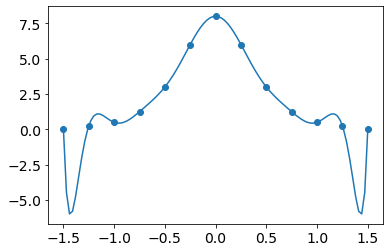

In [1]:
x = [ -1.5, -1.25, -1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5 ]
y = [ 0.0, 0.25, 0.5, 1.25, 3.0, 6.0, 8.0, 6.0, 3.0, 1.25, 0.5, 0.25, 0.0 ]

# import libraries
from naginterfaces.library import lapacklin
import numpy as np
from matplotlib import pyplot as plt
# set some global options
np.set_printoptions(precision=2,suppress=True)
plt.rcParams.update({'font.size': 14})

# set up problem and call NAG library
n = len(x)
M = np.zeros((n, n))
for j in range(n):
    M[:,j] = [xi ** (n-1-j) for xi in x]

(MM, ipiv, a) = lapacklin.dgesv(M, np.array(y).reshape(n,1) )

print('Polynomial coefficients: ')
print(a)

# plot results
plt.scatter(x,y)
xseq = np.linspace(x[0],x[-1], 101)
plt.plot(xseq, np.polyval(a, xseq) )
plt.show()

## Fit an interpolant that is piecewise monotonic

If you completed the previous exercise successfully, you should have seen that the simple fitted polynomial produced unwanted oscillations between data points.

Using the [Interpolation chapter introduction](https://www.nag.com/numeric/fl/nagdoc_fl26.2/html/e01/e01intro.html), identify a routine that fits functions of one variable using only the function values at a set of interpolation points.  Impose monotonicity on the interpolating function.  

You will then need to find the Python name for this routine by searching through the interpolation Submodule page in the Python documentation.  Each Submodule page also contains a link to the corresponding Chapter introduction in the NAG Fortran library.  Search for _intro_ in the Python Submodule documentation to find this link.

Do the interpolation, plot the results and compare with the results from simple polynomial interpolation.

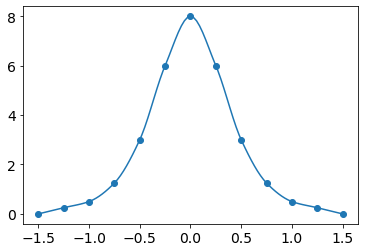

In [2]:
# import interpolation submodule from NAG python library
from naginterfaces.library import interp

# call NAG library
d = interp.dim1_monotonic(x, y)

# plot results
plt.scatter(x,y)
fx = interp.dim1_monotonic_eval(x, y, d, xseq)
plt.plot(xseq,fx)
plt.show()